Saving Arcane.jpg to Arcane (4).jpg
Image Shape: 680 1200 3


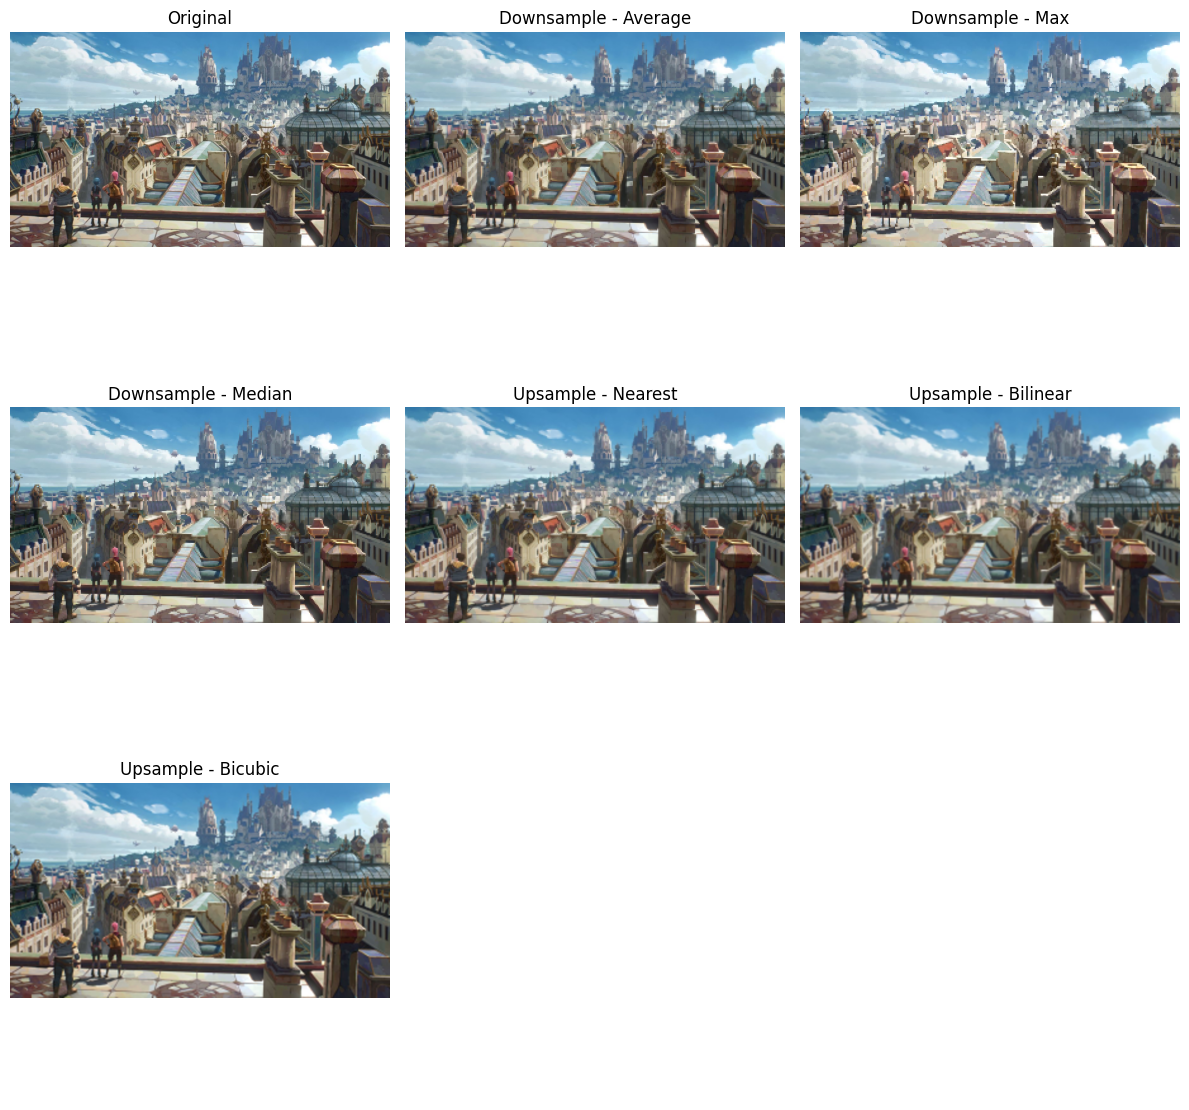

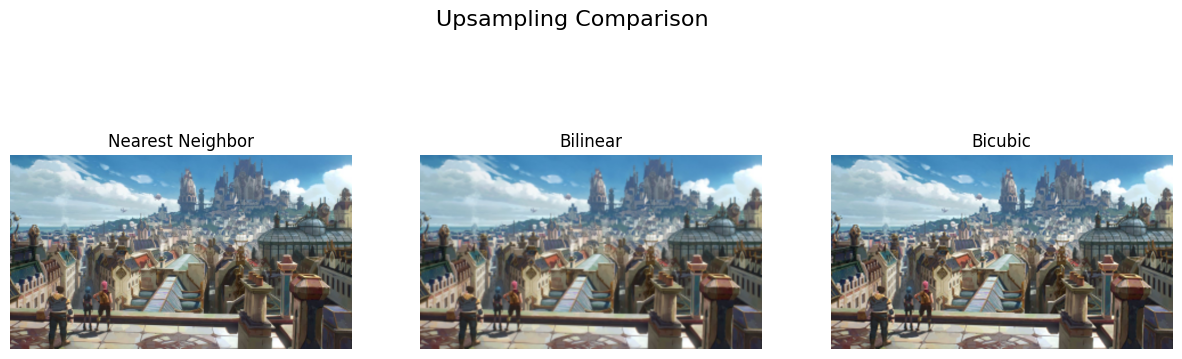

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img1 = cv2.imread(filename, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
m, n, c = img1.shape
print("Image Shape:", m, n, c)

f = 4

avg_down = cv2.resize(img1, (n//f, m//f), interpolation=cv2.INTER_AREA)

def max_pooling_color(img, f):
    m, n, c = img.shape
    out_m, out_n = m // f, n // f
    out = np.zeros((out_m, out_n, c), dtype=np.uint8)
    for ch in range(c):
        for i in range(out_m):
            for j in range(out_n):
                block = img[i*f:(i+1)*f, j*f:(j+1)*f, ch]
                out[i, j, ch] = np.max(block)
    return out

max_down = max_pooling_color(img1, f)

def median_pooling_color(img, f):
    m, n, c = img.shape
    out_m, out_n = m // f, n // f
    out = np.zeros((out_m, out_n, c), dtype=np.uint8)
    for ch in range(c):
        for i in range(out_m):
            for j in range(out_n):
                block = img[i*f:(i+1)*f, j*f:(j+1)*f, ch]
                out[i, j, ch] = np.median(block)
    return out

median_down = median_pooling_color(img1, f)

nn_img = cv2.resize(avg_down, (n, m), interpolation=cv2.INTER_NEAREST)
bilinear_img = cv2.resize(avg_down, (n, m), interpolation=cv2.INTER_LINEAR)
bicubic_img = cv2.resize(avg_down, (n, m), interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].imshow(img1); axs[0, 0].set_title("Original")
axs[0, 1].imshow(avg_down); axs[0, 1].set_title("Downsample - Average")
axs[0, 2].imshow(max_down); axs[0, 2].set_title("Downsample - Max")

axs[1, 0].imshow(median_down); axs[1, 0].set_title("Downsample - Median")
axs[1, 1].imshow(nn_img); axs[1, 1].set_title("Upsample - Nearest")
axs[1, 2].imshow(bilinear_img); axs[1, 2].set_title("Upsample - Bilinear")

axs[2, 0].imshow(bicubic_img); axs[2, 0].set_title("Upsample - Bicubic")
axs[2, 1].axis("off"); axs[2, 2].axis("off")

for ax in axs.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(nn_img); axs[0].set_title("Nearest Neighbor")
axs[1].imshow(bilinear_img); axs[1].set_title("Bilinear")
axs[2].imshow(bicubic_img); axs[2].set_title("Bicubic")

for ax in axs:
    ax.axis("off")

plt.suptitle("Upsampling Comparison", fontsize=16)
plt.show()
